# #8. Train a deep neural network on the CIFAR10 Dataset

Hello! This is SuperYorio! This Notebook is my solution to Aurelion Geron's Chapter 11 exercises! Since the solutions are not yet available, I would like to present my results with other readers! Obviously, my solution won't be as optimized as Geron's, but I hope we can learn by comparing our results!

A few important notes:
<ul>
     <li>To save time for this exercise, I have decided to use only part of the whole dataset.</li>
     <li>I used 15 epochs for each fit since the point of this exercise is to compare vanilla networks with normalized networks with other various regularizers rather than trying to achieve a high accuracy.</li>
     <li>The learning rate for each architecture aren't tuned using GridSearch, I simply hand tweaked a few values and picked the best ones</li>
     <li>I don't think we should stress over the accuracy. We are using DNN to classify images when in reality, CNN's would work much, much better.</li>
     <li>If you are an accuracy buff, I suggest you to thoroughly tune the learning rate and train on many more epochs!</li>
</ul>

a). Build a DNN with 20 hidden layers of 100 neurons each (that’s too many, but it’s the point of this exercise). Use He initialization and the ELU activation function.

Note: The CIFAR10 Dataset consists of 32 x 32 images with 3 color pixels, so the shape of an image is (32,32,3)

In [1]:
try:
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow 2.x
import tensorflow as tf
from tensorflow import keras

import numpy as np

TensorFlow 2.x selected.


In [0]:
def build_model(n_units=100, n_layers=20, activation='elu'):
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape=[32,32,3]))
    for _ in range(n_layers):
        model.add(keras.layers.Dense(n_units, activation, kernel_initializer="he_normal"))
        model.add(keras.layers.Dense(10, 'softmax'))
    return model

b). Using Nadam optimization and early stopping, train the network on the CIFAR10 dataset. You can load it with keras.datasets.cifar10.load_​data(). The dataset is composed of 60,000 32 × 32–pixel color images (50,000 for training, 10,000 for testing) with 10 classes, so you’ll need a softmax output layer with 10 neurons. Remember to search for the right learning rate each time you change the model’s architecture or hyperparameters.

In [0]:
cifar = keras.datasets.cifar10.load_data()
(X_train, y_train), (X_test, y_test) = cifar

To shorten up the training time, let's train on 20K images instead of 45K.

In [0]:
X_train = X_train[:20000]
y_train = y_train[:20000]
X_test = X_test[:4500]
y_test = y_test[:4500]

Now that we have the model configurations and the dataset ready, we can compile the model.

In [5]:
import time

model = build_model()
model.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.Nadam(), metrics=['accuracy'])
t0 = time.time()
history = model.fit(X_train, y_train, epochs=15, validation_split=0.1, callbacks=[keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)])
t1 = time.time()
total = t1 - t0

Train on 18000 samples, validate on 2000 samples
Epoch 1/15
18000/18000 [==============================] - 9s 477us/sample - loss: 6.6277 - accuracy: 0.1617 - val_loss: 2.0967 - val_accuracy: 0.2070
Epoch 2/15
18000/18000 [==============================] - 6s 338us/sample - loss: 2.0525 - accuracy: 0.2463 - val_loss: 2.0201 - val_accuracy: 0.2500
Epoch 3/15
18000/18000 [==============================] - 6s 322us/sample - loss: 1.9873 - accuracy: 0.2693 - val_loss: 2.0850 - val_accuracy: 0.2575
Epoch 4/15
18000/18000 [==============================] - 6s 329us/sample - loss: 1.9397 - accuracy: 0.2908 - val_loss: 1.9915 - val_accuracy: 0.2855
Epoch 5/15
18000/18000 [==============================] - 6s 332us/sample - loss: 1.9135 - accuracy: 0.3053 - val_loss: 1.9891 - val_accuracy: 0.2880
Epoch 6/15
18000/18000 [==============================] - 5s 301us/sample - loss: 1.8715 - accuracy: 0.3199 - val_loss: 1.8857 - val_accuracy: 0.3200
Epoch 7/15
18000/18000 [===========================

In [6]:
print("Time Spanned:", np.round(total, 2))

Time Spanned: 91.94


In [7]:
model.evaluate(X_test, y_test)

4500/4500 [==============================] - 0s 88us/sample - loss: 1.8068 - accuracy: 0.3442


[1.8068271695242988, 0.34422222]

c). Now try adding Batch Normalization and compare the learning curves: Is it converging faster than before? Does it produce a better model? How does it affect training speed?

In [0]:
def build_model_w_BN(n_units=100, n_layers=20, activation='elu'):
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape=[32,32,3]))
    model.add(keras.layers.BatchNormalization(momentum=0.9))
    for _ in range(n_layers):
        model.add(keras.layers.Dense(n_units, activation, kernel_initializer="he_normal"))
        model.add(keras.layers.BatchNormalization(momentum=0.9))
    model.add(keras.layers.Dense(10, 'softmax'))
    return model

In [9]:
model = build_model_w_BN()
model.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.Nadam(learning_rate=0.01), metrics=['accuracy'])
t0 = time.time()
history_w_BN = model.fit(X_train, y_train, epochs=15, validation_split=0.1, callbacks=[keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)])
t1 = time.time()
total = t1 - t0

Train on 18000 samples, validate on 2000 samples
Epoch 1/15
18000/18000 [==============================] - 23s 1ms/sample - loss: 2.1066 - accuracy: 0.2176 - val_loss: 2.0846 - val_accuracy: 0.2140
Epoch 2/15
18000/18000 [==============================] - 16s 895us/sample - loss: 1.9157 - accuracy: 0.2861 - val_loss: 1.9248 - val_accuracy: 0.2695
Epoch 3/15
18000/18000 [==============================] - 16s 893us/sample - loss: 1.8616 - accuracy: 0.3075 - val_loss: 1.8725 - val_accuracy: 0.2950
Epoch 4/15
18000/18000 [==============================] - 16s 907us/sample - loss: 1.8213 - accuracy: 0.3293 - val_loss: 1.8221 - val_accuracy: 0.3400
Epoch 5/15
18000/18000 [==============================] - 17s 925us/sample - loss: 1.7935 - accuracy: 0.3377 - val_loss: 1.8057 - val_accuracy: 0.3370
Epoch 6/15
18000/18000 [==============================] - 17s 934us/sample - loss: 1.7618 - accuracy: 0.3538 - val_loss: 1.7909 - val_accuracy: 0.3335
Epoch 7/15
18000/18000 [=======================

In [10]:
print("Time Spanned for BN:", np.round(total, 2))

Time Spanned for BN: 258.09


In [11]:
model.evaluate(X_test, y_test)

4500/4500 [==============================] - 1s 136us/sample - loss: 1.6286 - accuracy: 0.4156


[1.6285865443547567, 0.41555557]

Learning Curve for Model without BN:


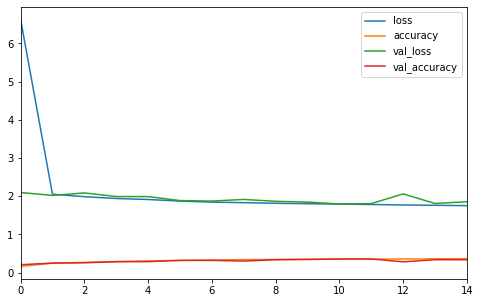

In [12]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

def plot_learning_curve(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))

print("Learning Curve for Model without BN:")
plot_learning_curve(history)

Learning Curve for Model with BN:


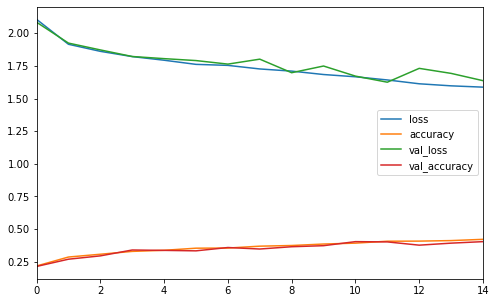

In [13]:
print("Learning Curve for Model with BN:")
plot_learning_curve(history_w_BN)

d). Try replacing Batch Normalization with SELU, and make the necessary adjustements to ensure the network self-normalizes (i.e., standardize the input features, use LeCun normal initialization, make sure the DNN contains only a sequence of dense layers, etc.).

In [0]:
def build_model_SN(n_units=100, n_layers=20, activation='selu'):
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape=[32,32,3]))
    model.add(keras.layers.BatchNormalization())
    for _ in range(n_layers):
        model.add(keras.layers.Dense(n_units, activation, kernel_initializer="lecun_normal"))
        model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dense(10, 'softmax'))
    return model

In [15]:
model = build_model_SN()
model.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.Nadam(learning_rate=0.01), metrics=['accuracy'])
t0 = time.time()
history_SN = model.fit(X_train, y_train, epochs=15, validation_split=0.1, callbacks=[keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)])
t1 = time.time()
total = t1 - t0

Train on 18000 samples, validate on 2000 samples
Epoch 1/15
18000/18000 [==============================] - 24s 1ms/sample - loss: 2.1493 - accuracy: 0.2034 - val_loss: 3.2608 - val_accuracy: 0.1820
Epoch 2/15
18000/18000 [==============================] - 16s 915us/sample - loss: 1.9526 - accuracy: 0.2601 - val_loss: 2.3529 - val_accuracy: 0.2350
Epoch 3/15
18000/18000 [==============================] - 16s 900us/sample - loss: 1.8880 - accuracy: 0.2965 - val_loss: 3.0627 - val_accuracy: 0.2355
Epoch 4/15
18000/18000 [==============================] - 17s 921us/sample - loss: 1.8382 - accuracy: 0.3220 - val_loss: 2.9155 - val_accuracy: 0.1885
Epoch 5/15
18000/18000 [==============================] - 17s 946us/sample - loss: 1.8249 - accuracy: 0.3298 - val_loss: 3.1920 - val_accuracy: 0.2000
Epoch 6/15
18000/18000 [==============================] - 17s 931us/sample - loss: 1.7898 - accuracy: 0.3362 - val_loss: 2.0065 - val_accuracy: 0.2885
Epoch 7/15
18000/18000 [=======================

In [16]:
print("Time Spanned for SN:", np.round(total, 2))

Time Spanned for SN: 258.44


In [17]:
model.evaluate(X_test, y_test)

4500/4500 [==============================] - 1s 155us/sample - loss: 1.8351 - accuracy: 0.3831


[1.835073950237698, 0.38311112]

Learning Curve for SN Model:


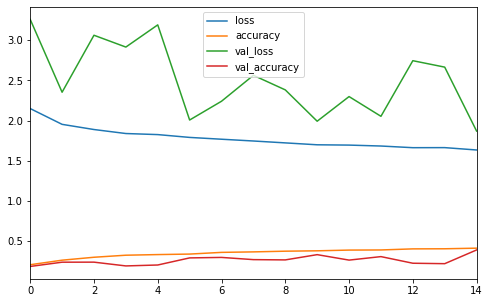

In [18]:
print("Learning Curve for SN Model:")
plot_learning_curve(history_SN)

Overall, the accuracy increases from Vanilla < Self-Normalize < Batch Normalization neural networks. Although SN and BN both took more time during training speed than a Vanilla network, it did converge in a better minimum and thus have better performance in terms of accuracy. That said, BN and SN can achieve higher accuracy than Vanilla using only 15 epochs.

Now that we have finished training 3 different neural networks, we can see that neural networks with Batch Normalization and self-normalization has faster training speed in the sense that it reaches higher accuracy faster than the neural network without any normalization.

e). Try regularizing the model with alpha dropout. Then, without retraining your model, see if you can achieve better accuracy using MC Dropout.

In [0]:
def build_model_Alpha(n_units=100, n_layers=20, activation='elu'):
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape=[32,32,3]))
    model.add(keras.layers.BatchNormalization(momentum=0.9))
    for _ in range(n_layers):
        model.add(keras.layers.Dense(n_units, activation, kernel_initializer="he_normal"))
        model.add(keras.layers.AlphaDropout(rate=0.2))
    model.add(keras.layers.Dense(10, 'softmax'))
    return model

In [20]:
model = build_model_Alpha()
model.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.Nadam(learning_rate=0.001), metrics=['accuracy'])
t0 = time.time()
history_Alpha = model.fit(X_train, y_train, epochs=15, validation_split=0.1, callbacks=[keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)])
t1 = time.time()
total = t1 - t0

Train on 18000 samples, validate on 2000 samples
Epoch 1/15
18000/18000 [==============================] - 11s 606us/sample - loss: 2.5792 - accuracy: 0.1082 - val_loss: 74.1533 - val_accuracy: 0.1045
Epoch 2/15
18000/18000 [==============================] - 8s 439us/sample - loss: 2.2033 - accuracy: 0.1573 - val_loss: 241.8973 - val_accuracy: 0.1025
Epoch 3/15
18000/18000 [==============================] - 7s 392us/sample - loss: 2.1019 - accuracy: 0.1729 - val_loss: 57.4536 - val_accuracy: 0.1010
Epoch 4/15
18000/18000 [==============================] - 7s 396us/sample - loss: 2.0703 - accuracy: 0.1800 - val_loss: 78.9640 - val_accuracy: 0.0960
Epoch 5/15
18000/18000 [==============================] - 8s 422us/sample - loss: 2.0465 - accuracy: 0.1864 - val_loss: 128.6582 - val_accuracy: 0.1035
Epoch 6/15
18000/18000 [==============================] - 7s 395us/sample - loss: 2.0293 - accuracy: 0.1971 - val_loss: 81.0856 - val_accuracy: 0.1075
Epoch 7/15
18000/18000 [==================

In [21]:
print("Time Spanned for Dropout:", np.round(total, 2))

Time Spanned for Dropout: 115.36


In [22]:
model.evaluate(X_test, y_test)

4500/4500 [==============================] - 0s 96us/sample - loss: 42.5084 - accuracy: 0.1118


[42.50837128363715, 0.111777775]

Learning Curve for Model with Alpha Dropout:


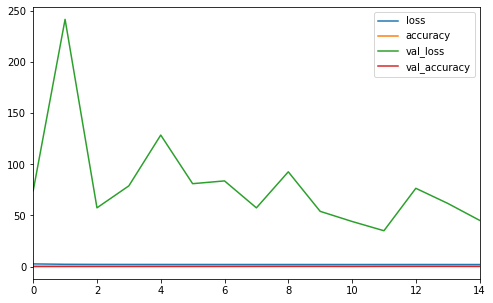

In [23]:
print("Learning Curve for Model with Alpha Dropout:")
plot_learning_curve(history_Alpha)

The learning curve is obviously wacky. I think the main issue lies in that it's not optimized enough and the hyperparameters are not tuned. Also, keep in mind that the data is shortened for the sake of computational time.

Let's apply MC Dropout!

In [0]:
X_test_mod = tf.dtypes.cast(X_test, tf.float32)
y_prob = np.stack([model(X_test_mod, training=True) for sample in range(100)])
y_mean = y_prob.mean(axis=0)
y_std = y_prob.std(axis=0)

In [25]:
np.round(model.predict(X_test[:1]), 2)

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [26]:
np.round(y_prob[:, :1], 2)

array([[[0.03, 0.02, 0.13, 0.17, 0.2 , 0.13, 0.17, 0.12, 0.02, 0.02]],

       [[0.02, 0.01, 0.12, 0.16, 0.17, 0.21, 0.18, 0.12, 0.01, 0.01]],

       [[0.02, 0.01, 0.15, 0.15, 0.16, 0.18, 0.16, 0.13, 0.01, 0.02]],

       [[0.03, 0.03, 0.14, 0.15, 0.11, 0.16, 0.15, 0.17, 0.02, 0.04]],

       [[0.03, 0.02, 0.15, 0.12, 0.17, 0.2 , 0.13, 0.14, 0.02, 0.02]],

       [[0.02, 0.02, 0.15, 0.15, 0.14, 0.17, 0.16, 0.13, 0.02, 0.02]],

       [[0.04, 0.03, 0.14, 0.13, 0.16, 0.16, 0.15, 0.14, 0.03, 0.03]],

       [[0.02, 0.03, 0.14, 0.13, 0.15, 0.18, 0.15, 0.14, 0.02, 0.03]],

       [[0.05, 0.05, 0.14, 0.13, 0.14, 0.13, 0.1 , 0.14, 0.04, 0.08]],

       [[0.04, 0.04, 0.12, 0.14, 0.14, 0.19, 0.14, 0.12, 0.04, 0.04]],

       [[0.06, 0.04, 0.15, 0.13, 0.12, 0.19, 0.13, 0.13, 0.03, 0.02]],

       [[0.03, 0.02, 0.13, 0.15, 0.16, 0.17, 0.12, 0.16, 0.02, 0.03]],

       [[0.02, 0.02, 0.16, 0.13, 0.15, 0.21, 0.15, 0.14, 0.01, 0.02]],

       [[0.03, 0.01, 0.11, 0.16, 0.18, 0.18, 0.16, 0.14, 0.02, 0

In [27]:
np.round(y_mean[:1], 2)

array([[0.04, 0.03, 0.14, 0.14, 0.15, 0.17, 0.14, 0.14, 0.02, 0.03]],
      dtype=float32)

In [28]:
y_std = y_prob.std(axis=0)
np.round(y_std[:1], 2)

array([[0.02, 0.02, 0.02, 0.02, 0.02, 0.03, 0.02, 0.02, 0.01, 0.02]],
      dtype=float32)

In [0]:
y_pred = np.argmax(y_mean, axis=1)

In [30]:
y_pred

array([5, 9, 8, ..., 9, 8, 5])

In [31]:
y_test_shaped = y_test.reshape(len(y_pred))
y_test_shaped

array([3, 8, 8, ..., 8, 8, 3], dtype=uint8)

In [32]:
count = 0
for ix in range(len(y_pred)):
    if y_pred[ix] == y_test[ix]:
        count += 1
print("Accuracy:", count / len(y_test))

Accuracy: 0.22355555555555556


That's great! The accuracy boosted from 11% to 22%!

f). Apply 1CycleScheduler and compare accuracy and speed!

Note: The following code is obtained from the author's notebook. I simply applied them into my model, as per the instruction!

In [0]:
K = keras.backend
class OneCycleScheduler(keras.callbacks.Callback):
    def __init__(self, iterations, max_rate, start_rate=None,
                 last_iterations=None, last_rate=None):
        self.iterations = iterations
        self.max_rate = max_rate
        self.start_rate = start_rate or max_rate / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_rate = last_rate or self.start_rate / 1000
        self.iteration = 0
    def _interpolate(self, iter1, iter2, rate1, rate2):
        return ((rate2 - rate1) * (self.iteration - iter1)
                / (iter2 - iter1) + rate1)
    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            rate = self._interpolate(0, self.half_iteration, self.start_rate, self.max_rate)
        elif self.iteration < 2 * self.half_iteration:
            rate = self._interpolate(self.half_iteration, 2 * self.half_iteration,
                                     self.max_rate, self.start_rate)
        else:
            rate = self._interpolate(2 * self.half_iteration, self.iterations,
                                     self.start_rate, self.last_rate)
            rate = max(rate, self.last_rate)
        self.iteration += 1
        K.set_value(self.model.optimizer.lr, rate)

In [34]:
model = build_model_Alpha()
batch_size = 32
onecycle = OneCycleScheduler(len(X_train) // batch_size * 15, max_rate=0.05)
model.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.Nadam(learning_rate=0.001), metrics=['accuracy'])
t0 = time.time()
history_Alpha = model.fit(X_train, y_train, epochs=15, validation_split=0.1, callbacks=[onecycle, keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)])
t1 = time.time()
total = t1 = t0

Train on 18000 samples, validate on 2000 samples
Epoch 1/15
18000/18000 [==============================] - 11s 619us/sample - loss: 2.4479 - accuracy: 0.1020 - val_loss: 2.3740 - val_accuracy: 0.1055
Epoch 2/15
18000/18000 [==============================] - 8s 429us/sample - loss: 104.8880 - accuracy: 0.1003 - val_loss: 2.4343 - val_accuracy: 0.1015
Epoch 3/15
18000/18000 [==============================] - 8s 428us/sample - loss: 1475322903.4770 - accuracy: 0.1007 - val_loss: 3.0682 - val_accuracy: 0.0970
Epoch 4/15
18000/18000 [==============================] - 8s 431us/sample - loss: 551268415.5212 - accuracy: 0.1024 - val_loss: 3.1199 - val_accuracy: 0.1120
Epoch 5/15
18000/18000 [==============================] - 8s 437us/sample - loss: 2.6231 - accuracy: 0.0993 - val_loss: 4.0476 - val_accuracy: 0.0985
Epoch 6/15
18000/18000 [==============================] - 7s 415us/sample - loss: 27015587199993560.0000 - accuracy: 0.0998 - val_loss: 2.5726 - val_accuracy: 0.0985


In [36]:
model.evaluate(X_test, y_test)

4500/4500 [==============================] - 0s 98us/sample - loss: 2.3764 - accuracy: 0.1013


[2.376372030046251, 0.101333335]

In this case, the 1Cycle Scheduler does not appear to have any improvements in terms of time and accuracy. The loss also exploded.